In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [5]:
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows: ", duplicate_rows)

Duplicate Rows:  0


In [6]:
nan_values = df.isna().sum()
print("NaN Values:\n", nan_values)

NaN Values:
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [7]:
df = df.dropna(axis=0)

In [8]:
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [9]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [10]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [11]:
import pandas as pd

mean_consumption_by_car = df.groupby("car name")["mpg"].mean()

print(mean_consumption_by_car.head())

car name
amc ambassador brougham    13.00
amc ambassador dpl         15.00
amc ambassador sst         17.00
amc concord                21.85
amc concord d/l            18.10
Name: mpg, dtype: float64


In [12]:
#Feature Engineering
df['horsepower_per_weight'] = df['horsepower'] / df['weight']
df['displacement_per_cylinder'] = df['displacement'] / df['cylinders']
df['horsepower_squared'] = df['horsepower'] ** 2
df['weight_cubed'] = df['weight'] ** 3
df['displacement_squared'] = df['displacement']**2
df['weight_horsepower_interaction'] = df['weight'] * df['horsepower']
df['displacement_weight_interaction'] = df['displacement'] * df['weight']

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower_per_weight,displacement_per_cylinder,horsepower_squared,weight_cubed,displacement_squared,weight_horsepower_interaction,displacement_weight_interaction
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0.037100,38.375,16900.0,43022168064,94249.0,455520.0,1075728.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.044679,43.750,27225.0,50366053557,122500.0,609345.0,1292550.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0.043655,39.750,22500.0,40565745856,101124.0,515400.0,1092648.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.043694,38.000,22500.0,40459583737,92416.0,514950.0,1043632.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0.040591,37.750,19600.0,41027927849,91204.0,482860.0,1041598.0


In [14]:
X = df.drop(['mpg', 'car name'], axis = 1)
y = df['mpg']

In [15]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower_per_weight,displacement_per_cylinder,horsepower_squared,weight_cubed,displacement_squared,weight_horsepower_interaction,displacement_weight_interaction
0,8,307.0,130.0,3504,12.0,70,1,0.037100,38.375,16900.0,43022168064,94249.0,455520.0,1075728.0
1,8,350.0,165.0,3693,11.5,70,1,0.044679,43.750,27225.0,50366053557,122500.0,609345.0,1292550.0
2,8,318.0,150.0,3436,11.0,70,1,0.043655,39.750,22500.0,40565745856,101124.0,515400.0,1092648.0
3,8,304.0,150.0,3433,12.0,70,1,0.043694,38.000,22500.0,40459583737,92416.0,514950.0,1043632.0
4,8,302.0,140.0,3449,10.5,70,1,0.040591,37.750,19600.0,41027927849,91204.0,482860.0,1041598.0


In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [18]:
print(np.any(np.isnan(X_train)))

True


In [19]:
print(np.any(np.isnan(X_test)))

True


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [21]:
print(np.any(np.isnan(X_train)))

False


In [22]:
print(np.any(np.isnan(X_test)))

False


In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [26]:
plt.Figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

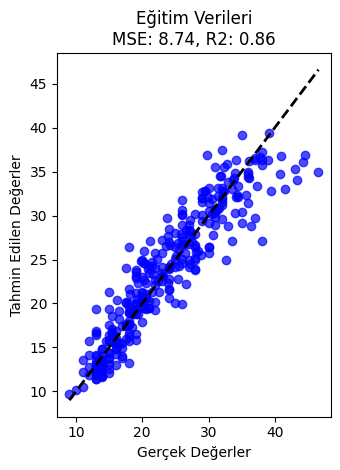

In [27]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title(f'Eğitim Verileri\nMSE: {train_mse:.2f}, R2: {train_r2:.2f}')
plt.tight_layout()
plt.show()

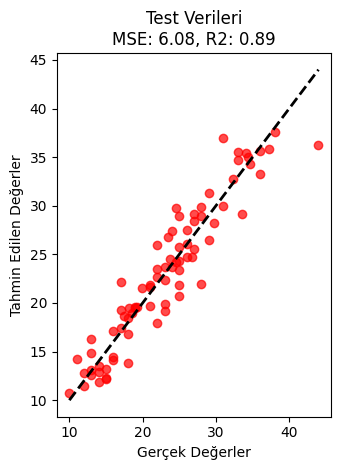

In [28]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title(f'Test Verileri\nMSE: {test_mse:.2f}, R2: {test_r2:.2f}')

plt.tight_layout()
plt.show()

In [29]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

c:\Users\ecems\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.15854e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [30]:
y_test_pred_ridge = ridge_regressor.predict(X_test)
y_train_pred_ridge = ridge_regressor.predict(X_train)

In [31]:
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

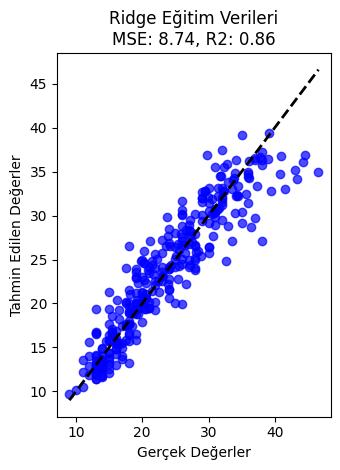

In [32]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ridge, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title(f'Ridge Eğitim Verileri\nMSE: {train_mse_ridge:.2f}, R2: {train_r2_ridge:.2f}')
plt.tight_layout()
plt.show()

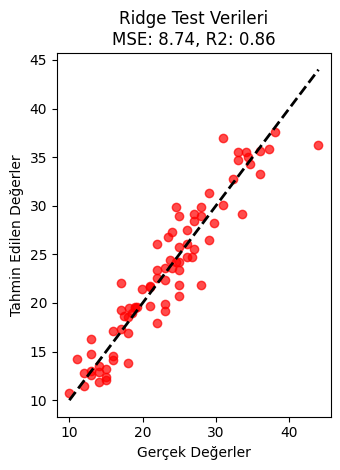

In [35]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title(f'Ridge Test Verileri\nMSE: {train_mse_ridge:.2f}, R2: {train_r2_ridge:.2f}')
plt.tight_layout()
plt.show()